Hate speech is defined by the Cambridge Dictionary as "public speech that expresses hate or encourages violence towards a person or group based on something such as race, religion, sex, or sexual orientation".

Steps to classify hate speech
- Preprocess the text data
- Convert text to numerical tokens
- Build and Train ML
- Test the Model
- Save and use it later

In [11]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\icluster\appdata\local\temp\pip-req-build-p2ygr23f
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3


  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\ICLUSTER\AppData\Local\Temp\pip-req-build-p2ygr23f'


In [39]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, MaxPooling1D

In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import preprocess_kgptalkie as ps

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/hate_speech_dataset/master/data.csv', index_col = 0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
#0 - hate speech | 1 - offensive language | 2 - neither

In [5]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [6]:
vc = df['class'].value_counts()
index = list(vc.index)
count = min(vc.values)

In [7]:
count, index

(1430, [1, 2, 0])

In [8]:
df_bal = pd.DataFrame()
for i in index:
  temp = df[df['class']==i].sample(count)
  df_bal = df_bal.append(temp, ignore_index = True)

In [9]:
df = df_bal.copy()

In [10]:
df['class'].value_counts()

1    1430
2    1430
0    1430
Name: class, dtype: int64

# Preprocessing

In [12]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [13]:
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))

In [14]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,1,2,0,1,nobody cares you fucking fag damn you bring bi...
1,6,0,6,0,1,aye the part be treating the bitches too good
2,3,0,3,0,1,retweet cdashray if all you gunna do is bitch ...
3,3,0,3,0,1,yo bitch bitch gone let me fuck tonightthursty...
4,3,0,3,0,1,without the hoes it was gonna be hard for us t...


# Text Tokenization

In [15]:
text = df['tweet'].tolist()

In [16]:
text[:2]

['nobody cares you fucking fag damn you bring bitches water even though youre thirsty as fuck fucknigga',
 'aye the part be treating the bitches too good']

In [17]:
token = Tokenizer()
token.fit_on_texts(text)

In [18]:
len(token.word_counts)

11648

In [19]:
print(token.index_word)

{1: 'a', 2: 'i', 3: 'the', 4: 'retweet', 5: 'you', 6: 'to', 7: 'is', 8: 'bitch', 9: 'and', 10: 'not', 11: 'my', 12: 'that', 13: 'in', 14: 'of', 15: 'like', 16: 'it', 17: 'on', 18: 'am', 19: 'be', 20: 'this', 21: 'for', 22: 'do', 23: 'me', 24: 'trash', 25: 'your', 26: 'ass', 27: 'out', 28: 'are', 29: 'bitches', 30: 'with', 31: 'all', 32: 'they', 33: 'just', 34: 'so', 35: 'up', 36: 'but', 37: 'if', 38: 'fuck', 39: 'nigga', 40: 'have', 41: 'get', 42: 'pussy', 43: 'hoes', 44: 'was', 45: 'no', 46: 'he', 47: 'faggot', 48: 'at', 49: 'when', 50: 'hoe', 51: 'what', 52: 'about', 53: 'can', 54: 'these', 55: 'laughing', 56: 'got', 57: 'she', 58: 'white', 59: 'loud', 60: 'fucking', 61: 'off', 62: 'we', 63: 'shit', 64: 'will', 65: 'know', 66: 'niggas', 67: 'how', 68: 'bird', 69: 'who', 70: 'would', 71: 'or', 72: 'nigger', 73: 'as', 74: 'her', 75: 'people', 76: 'youre', 77: 'them', 78: 'some', 79: 'his', 80: 'go', 81: 'one', 82: 'from', 83: 'yankees', 84: 'want', 85: 'now', 86: 'love', 87: 'say', 88:

In [21]:
x = ['i love you']

In [22]:
token.texts_to_sequences(x)

[[2, 86, 5]]

In [23]:
vocab_size = len(token.word_counts) + 1

In [24]:
encoded_text = token.texts_to_sequences(text)

In [25]:
print(encoded_text)

[[303, 938, 5, 60, 95, 173, 5, 373, 29, 538, 121, 157, 76, 1112, 73, 38, 3783], [1337, 3, 939, 19, 2340, 3, 29, 108, 102], [4, 3784, 37, 31, 5, 1338, 22, 7, 8, 97, 142, 128, 26, 280], [99, 8, 8, 329, 168, 23, 38, 3785, 1686, 48, 3, 2341, 3786], [426, 3, 43, 16, 44, 193, 19, 393, 21, 131, 6, 394, 27, 102, 245, 34, 43, 5, 356, 1, 102, 313, 246, 17, 3787], [3788, 51, 54, 29, 84, 82, 615, 39], [4, 3789, 3790, 7, 10, 1, 3791, 8, 12, 3792, 9, 3793, 23], [2, 19, 173, 37, 2, 80, 3794, 3795, 9, 41, 11, 26, 2342, 35, 2, 940, 830, 16, 92, 15, 8, 2, 188, 145, 14, 1339, 3796], [91, 58, 24, 9, 2343, 28, 2344, 111, 3, 395, 314, 226, 3797], [20, 8, 1687, 23, 27], [3798, 209, 2345, 9, 1113, 9, 3, 43, 55, 27, 59, 46, 33, 84, 19, 2346, 55, 27, 59], [3799, 2347, 1340, 3800, 6, 1341, 539, 540, 27, 116, 85, 3801, 22, 10, 65, 830, 1, 342, 1114, 7, 2, 19, 3802, 1341, 43, 3803, 1115], [1342, 32, 45, 3804, 18, 10, 941, 45, 8], [541, 48, 5, 43, 3805], [4, 3806, 2, 56, 252, 17, 2348, 18, 96, 3807], [2, 19, 15, 39

In [26]:
max_length = 120
X = pad_sequences(encoded_text, maxlen=max_length, padding = 'post')

In [27]:
print(X)

[[  303   938     5 ...     0     0     0]
 [ 1337     3   939 ...     0     0     0]
 [    4  3784    37 ...     0     0     0]
 ...
 [11647 11648     7 ...     0     0     0]
 [ 3778    25     1 ...     0     0     0]
 [  223     7    21 ...     0     0     0]]


In [28]:
X.shape

(4290, 120)

# Model Building

In [29]:
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [30]:
y = df['class']

In [31]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4285    0
4286    0
4287    0
4288    0
4289    0
Name: class, Length: 4290, dtype: int64

In [32]:
y = np_utils.to_categorical(df['class'])

In [33]:
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [35]:
X_train.shape, X_test.shape

((3432, 120), (858, 120))

In [36]:
vec_size = 300
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))

In [37]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 2, validation_data=(X_test, y_test), shuffle = True)

Epoch 1/2
108/108 [==============================] - 9s 78ms/step - loss: 0.9482 - accuracy: 0.5743 - val_loss: 0.6677 - val_accuracy: 0.7681
Epoch 2/2
108/108 [==============================] - 8s 78ms/step - loss: 0.5117 - accuracy: 0.8097 - val_loss: 0.5111 - val_accuracy: 0.8042


# Model Testing

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [41]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

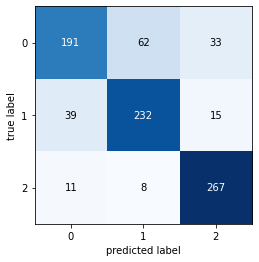

In [42]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test, axis=-1), y_pred))


In [43]:
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       286
           1       0.77      0.81      0.79       286
           2       0.85      0.93      0.89       286

    accuracy                           0.80       858
   macro avg       0.80      0.80      0.80       858
weighted avg       0.80      0.80      0.80       858



# Testing with Custom Data

In [44]:
x = 'hey bitch whass up'

In [45]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding = 'post')
  return x

In [46]:
get_encoded(x)

array([[325,   8,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0]])

In [47]:
np.argmax(model.predict(get_encoded(x)), axis=-1)

array([1], dtype=int64)

In [48]:
#array[1]-offensive language

In [49]:
model.save('model_hate_speech.h5',)

In [50]:
import pickle

In [51]:
pickle.dump(token, open('token.pkl', 'wb'))